In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('train.csv')

In [5]:
na_revenue = data.loc[data['belongs_to_collection'].isna(), 'revenue']
col_revenue = data.loc[data['belongs_to_collection'].notnull(),'revenue']

In [6]:
print('Number of movies not in collection:',len(na_revenue))
print('Number of movies in collection:', len(col_revenue))

Number of movies not in collection: 2396
Number of movies in collection: 604


In [12]:
revs = [na_revenue, col_revenue]

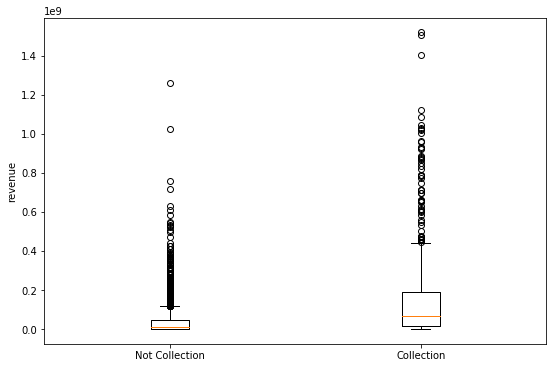

In [8]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(revs)
ax.set_xticklabels(['Not Collection', 'Collection'])
ax.set_ylabel('revenue')
fig.savefig('diffcollection.png', bbox_inches='tight')

In [13]:
q75n, q50n, q25n = np.percentile(revs[0], [75,50,25])
q75c, q50c, q25c = np.percentile(revs[1],[75,50,25])

print('Interquartile range for solo\n25%: {}\t50%: {}\t75%: {}'.format(q25n, q50n, q75n))
print('Interquartile range for collection\n25%: {}\t50%: {}\t75%: {}'.format(q25c, q50c, q75c))
print('Difference\n25%: {}\t50%: {}\t75%: {}'.format(q25n-q25c, q50n-q50c, q75n-q75c))

Interquartile range for solo
25%: 1500000.0	50%: 11407586.5	75%: 48037395.5
Interquartile range for collection
25%: 17244570.0	50%: 67417776.0	75%: 189376384.75
Difference
25%: -15744570.0	50%: -56010189.5	75%: -141338989.25


In [9]:
revs = [np.log(na_revenue), np.log(col_revenue)]

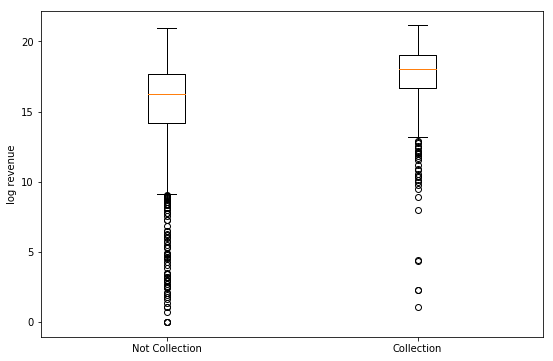

In [10]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(revs)
ax.set_xticklabels(['Not Collection', 'Collection'])
ax.set_ylabel('log revenue')
fig.savefig('logdiffcollection.png', bbox_inches='tight')

In [11]:
q75n, q50n, q25n = np.percentile(revs[0], [75,50,25])
q75c, q50c, q25c = np.percentile(revs[1],[75,50,25])

print('Interquartile range for solo\n25%: {}\t50%: {}\t75%: {}'.format(q25n, q50n, q75n))
print('Interquartile range for collection\n25%: {}\t50%: {}\t75%: {}'.format(q25c, q50c, q75c))
print('Difference\n25%: {}\t50%: {}\t75%: {}'.format(q25n-q25c, q50n-q50c, q75n-q75c))

#Correlation that belonging in a collection means higher revenue

Interquartile range for solo
25%: 14.22097566607244	50%: 16.249789111229923	75%: 17.687490280735595
Interquartile range for collection
25%: 16.66300140247109	50%: 18.026413714943857	75%: 19.059241616279774
Difference
25%: -2.4420257363986497	50%: -1.776624603713934	75%: -1.3717513355441788


In [49]:
use_data = pd.DataFrame()
use_data['iscollect'] = data['belongs_to_collection'].notnull().astype('int')
use_data['revenue'] = np.log(data['revenue'])

In [15]:
import json

In [16]:
genres = data['genres']

In [17]:
unique_genres = set()
for gen in genres:
    try:
        names = json.loads(gen.replace("'",'"'))
        name_list = [name['name'] for name in names]
        unique_genres.update(name_list)
    except:
        pass

In [18]:
list(unique_genres)

['Drama',
 'Crime',
 'Documentary',
 'Thriller',
 'Music',
 'TV Movie',
 'Foreign',
 'Science Fiction',
 'Fantasy',
 'Adventure',
 'Action',
 'Animation',
 'History',
 'Horror',
 'War',
 'Romance',
 'Western',
 'Comedy',
 'Mystery',
 'Family']

In [50]:
use_data = use_data.reindex(list(unique_genres)+['iscollect','revenue'],fill_value=0,axis='columns')

In [51]:
for i, gen in enumerate(genres):
    try:
        names = json.loads(gen.replace("'",'"'))
        name_list = [name['name'] for name in names]
        for n in name_list:
            use_data.at[i,n] = 1
    except:
        pass

In [52]:
use_data.head()

,Drama,Crime,Documentary,Thriller,Music,TV Movie,Foreign,Science Fiction,Fantasy,Adventure,...,History,Horror,War,Romance,Western,Comedy,Mystery,Family,iscollect,revenue
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,16.326300
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,18.370959
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.387512
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.588099
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.182614


In [33]:
rev = data['revenue']

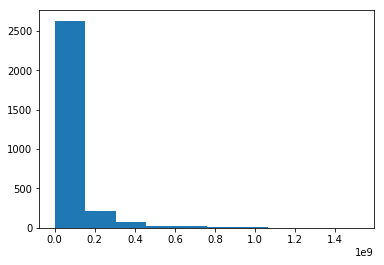

In [34]:
#Looks like the data has an exponential distribution
plt.hist(rev, bins=10)
plt.savefig('revhist.png')

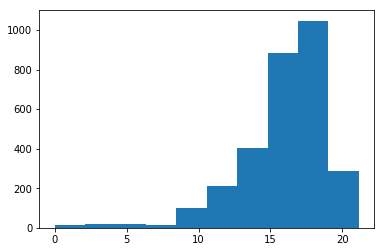

In [22]:
plt.hist(np.log(rev), bins=10)
plt.savefig('logrevhist.png')

In [66]:
print('Finding difference in log means\n')
for g in unique_genres:
    gen_rev = use_data.loc[use_data[g]==1,'revenue']
    nongen_rev = use_data.loc[use_data[g]==0,'revenue']
    print(g[:7], np.mean(gen_rev), "\tnot",g[:7] , np.mean(nongen_rev), "\tdiff: ",np.mean(gen_rev)-np.mean(nongen_rev) )

Finding difference in log means

Drama 15.565119161586344 	not Drama 16.371331500893504 	diff:  -0.8062123393071605
Crime 16.28921137388617 	not Crime 15.898871306538387 	diff:  0.39034006734778437
Documen 12.532945130895138 	not Documen 16.062244141714174 	diff:  -3.5292990108190363
Thrille 16.28132504652562 	not Thrille 15.845191293302854 	diff:  0.4361337532227658
Music 15.67648499076066 	not Music 15.969667211077658 	diff:  -0.29318222031699825
TV Movi 17.553180176247643 	not TV Movi 15.959363198074358 	diff:  1.593816978173285
Foreign 10.934655502729136 	not Foreign 16.012364126176045 	diff:  -5.0777086234469095
Science 16.902018543992522 	not Science 15.859076765108275 	diff:  1.0429417788842468
Fantasy 17.265236336319994 	not Fantasy 15.850487204181725 	diff:  1.4147491321382688
Adventu 17.576902272998787 	not Adventu 15.682711172727402 	diff:  1.8941911002713852
Action 16.852456260697842 	not Action 15.667115237726525 	diff:  1.1853410229713166
Animati 17.1316216395014 	not Ani